In [1]:
# ------------------------------------------
# Script: 1 (Preprocessing.ipynb)
# ------------------------------------------
# Author: Pratyay Sengupta
# ------------------------------------------

In [18]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import ssl
from ete3 import NCBITaxa
from io import StringIO
from itertools import accumulate
from matplotlib_venn import venn3
from scipy.optimize import curve_fit
from scipy.stats import norm, sem, t

# Configure SSL settings
ssl._create_default_https_context = ssl._create_unverified_context

# Set data directories
input_dir = '/mnt/Local_Disk_1/2_Hospital_Microbiome/Data/Input_data/'
output_dir = '/mnt/Local_Disk_1/2_Hospital_Microbiome/Data/Output_data/'
figures_dir = '/mnt/Local_Disk_1/2_Hospital_Microbiome/Data/Figures/'

In [19]:
# ------------------------------
# Data Loading
# ------------------------------

# Load microbial species abundance data
species_abundance = pd.read_csv(f'{input_dir}1. Data_Chng2020.xlsx - Chng_2020.csv', index_col='Species')

# Load group classification for each species
species_groups = pd.read_csv(f'{input_dir}1. Data_Chng2020.xlsx - Chng_2020_groups.csv', index_col='Species')

# Load sample metadata
sample_metadata = pd.read_csv(f'{input_dir}1. Data_Chng2020.xlsx - Metadata.csv', index_col='Illumina Library ID')

In [20]:
species_groups.head()

,Major_group
Species,
Abiotrophia defectiva,Bacteria
Acetobacter unclassified,Bacteria
Achromobacter piechaudii,Bacteria
Achromobacter unclassified,Bacteria
Achromobacter xylosoxidans,Bacteria


In [21]:
# Merge species abundance and group classification
merged_abundance = pd.merge(species_abundance, species_groups, on='Species', how='left')
merged_abundance

,SL336366,SL336368,SL343330,SL343331,SL343333,SL343334,SL343336,SL343337,SL343339,SL343341,...,WEE379,WEE380,WEE381,WEE382,WEE384,WEE385,WEE386,WEE387,WEE388,Major_group
Species,,,,,,,,,,,,,,,,,,,,,
Abiotrophia defectiva,0.0,0.0,0.0,0.0,0.0,0.388,0.0,0.0,0.0,0.0,...,0.000,0.0,0.578,0.0,0.129,0.777,0.518,0.0,0.0,Bacteria
Acetobacter unclassified,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,Bacteria
Achromobacter piechaudii,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.132,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,Bacteria
Achromobacter unclassified,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,Bacteria
Achromobacter xylosoxidans,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,Bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthomonas euvesicatoria,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.354,0.000,0.000,0.0,0.0,Bacteria
Xanthomonas fuscans,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,7.748,0.000,0.000,0.0,0.0,Bacteria
Xanthomonas oryzae,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,Bacteria


In [22]:
# ------------------------------
# Data Preprocessing
# ------------------------------

# Convert abundance data to binary presence/absence
species_presence = species_abundance.gt(0).astype(int).T
species_presence.index.name = 'Illumina Library ID'

# Link sample metadata with microbial presence data
presence_with_env = species_presence.copy()
presence_with_env['Environment'] = sample_metadata.loc[presence_with_env.index, 'Environment']

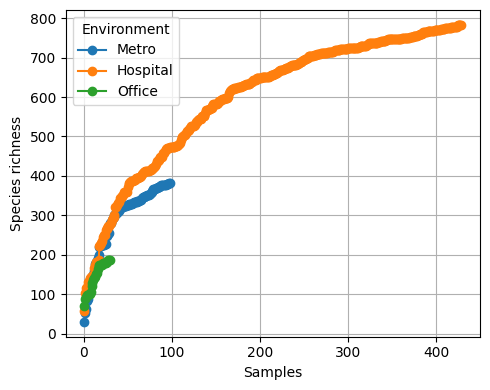

In [23]:
# ------------------------------
# Cumulative Species Count Plot
# ------------------------------

cumulative_counts = {}

for environment in presence_with_env['Environment'].unique():
    env_samples = presence_with_env[presence_with_env['Environment'] == environment].drop(columns='Environment')
    unique_species = set()
    cumulative_species_counts = []

    for _, sample in env_samples.iterrows():
        present_species = sample[sample > 0].index
        unique_species.update(present_species)
        cumulative_species_counts.append(len(unique_species))

    cumulative_counts[environment] = cumulative_species_counts

# Plot cumulative species discovery curve
plt.figure(figsize=(5, 4))

for env, counts in cumulative_counts.items():
    plt.plot(range(1, len(counts) + 1), counts, marker='o', label=env)

plt.xlabel('Samples')
plt.ylabel('Species richness')
plt.legend(title='Environment')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# ------------------------------
# Rarefaction Analysis
# ------------------------------

def compute_rarefaction(env_data, num_samples, n_replicates=100, allow_resampling=False):
    """
    Compute rarefaction curves and standard deviation for species richness.
    """
    richness_matrix = np.zeros((n_replicates, num_samples))

    for i in range(n_replicates):
        sampled_data = env_data.sample(n=num_samples, replace=allow_resampling or (env_data.shape[0] < num_samples))
        seen_species = set()
        richness = []

        for _, row in sampled_data.iterrows():
            present_species = row[row > 0].index
            seen_species.update(present_species)
            richness.append(len(seen_species))

        richness_matrix[i, :] = richness

    mean_richness = richness_matrix.mean(axis=0)
    std_richness = richness_matrix.std(axis=0)
    return mean_richness, std_richness

def plot_rarefaction_curves(presence_data, save_path, n_replicates=100):
    """
    Plot three rarefaction strategies: 
    - Using original sample sizes
    - Rarefaction to minimum sample count
    - Rarefaction to maximum sample count (with replacement)
    """
    fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)

    env_col = presence_data.columns[-1]
    environments = presence_data[env_col].unique()

    sample_counts = presence_data[env_col].value_counts()
    min_samples, max_samples = sample_counts.min(), sample_counts.max()

    strategies = [
        ("Original Sample Sizes", lambda df: df.shape[0], False),
        ("Rarefaction to Min Samples", lambda df: min_samples, False),
        ("Rarefaction to Max Samples", lambda df: max_samples, True)
    ]

    for ax, (title, sample_fn, allow_resampling) in zip(axes, strategies):
        for env in environments:
            env_samples = presence_data[presence_data[env_col] == env].iloc[:, :-1]
            n_samples = sample_fn(env_samples)

            mean_richness, std_richness = compute_rarefaction(env_samples, n_samples, n_replicates, allow_resampling)
            x = np.arange(1, n_samples + 1)

            ax.plot(x, mean_richness, label=env)
            ax.fill_between(x, mean_richness - std_richness, mean_richness + std_richness, alpha=0.2)

        ax.set_title(title)
        ax.set_xlabel('Samples')
        ax.grid(True)

    axes[0].set_ylabel('Species richness')
    axes[-1].legend(title="Environment")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path + 'Supplementary_Figure_1.svg', dpi=600)
    plt.show()

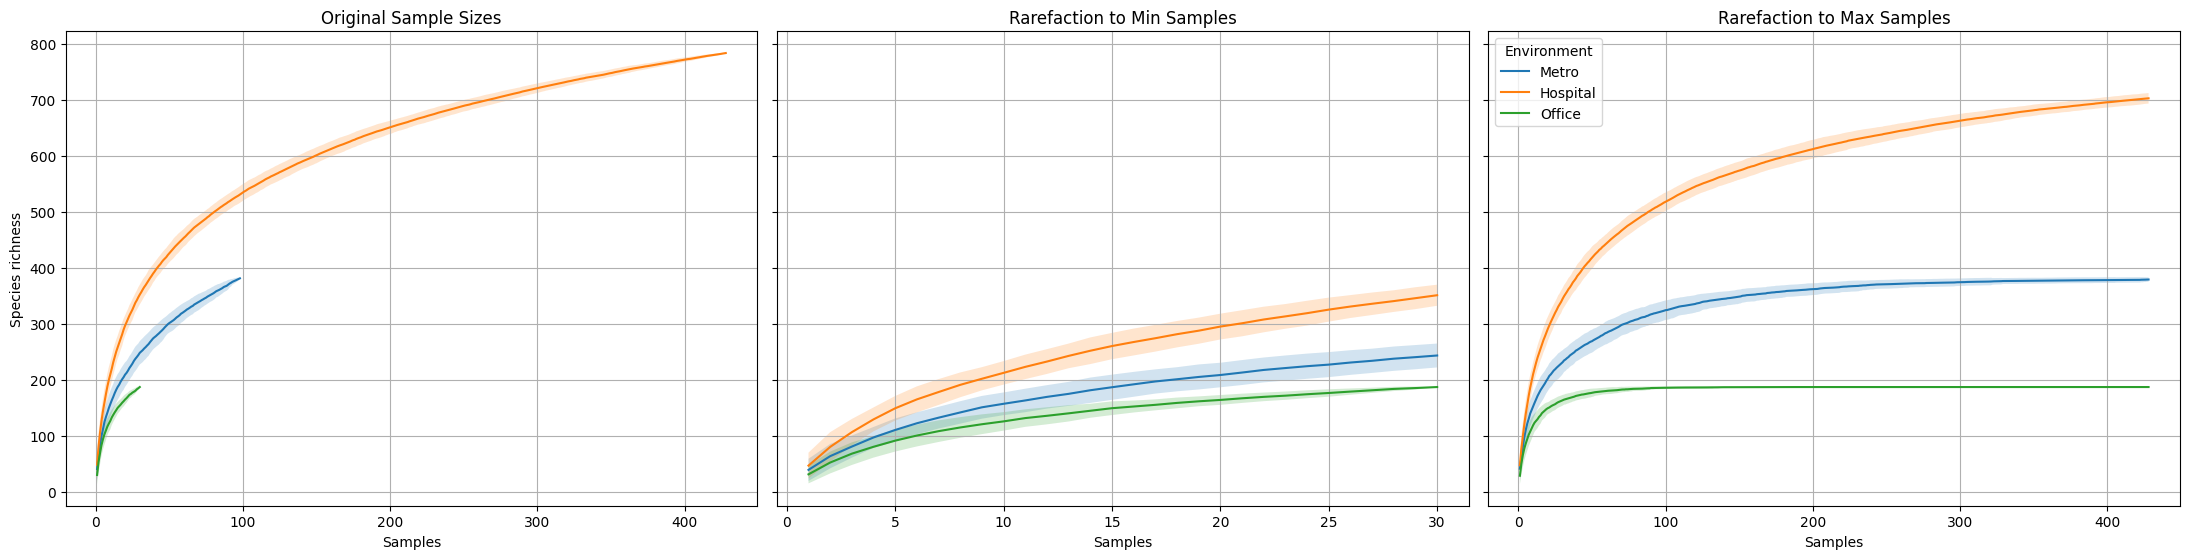

In [12]:
# Plot rarefaction
plot_rarefaction_curves(presence_with_env, figures_dir)

In [25]:
# ------------------------------
# Species Group Analysis
# ------------------------------

# Summarize species counts per environment
transposed_data = merged_abundance.T
data_with_env = pd.merge(transposed_data, sample_metadata['Environment'], left_index=True, right_index=True)

grouped_species_counts = data_with_env[data_with_env != 0].groupby('Environment').count().T
grouped_species_counts = grouped_species_counts.merge(species_groups, left_index=True, right_index=True)
grouped_species_counts.iloc[:, :-1] = grouped_species_counts.iloc[:, :-1].applymap(lambda x: 1 if x != 0 else 0)

grouped_by_major = grouped_species_counts.groupby('Major_group').sum()
grouped_by_major.T

Major_group,Archaea,Bacteria,Fungi,Virus
Hospital,3,642,10,127
Metro,2,350,2,26
Office,0,179,3,4


In [26]:
# ------------------------------
# Average Abundance Calculation
# ------------------------------

# Calculate average bacterial abundance across environments
abundance_by_group = {}

for major_group in merged_abundance['Major_group'].dropna().unique():
    group_sum = merged_abundance[merged_abundance['Major_group'] == major_group].sum(axis=0)
    group_df = pd.DataFrame(group_sum, columns=['Sum Abundance']).rename_axis('Illumina Library ID')
    merged_df = pd.merge(group_df, sample_metadata['Environment'], left_index=True, right_index=True)

    env_mean = merged_df.groupby('Environment')['Sum Abundance'].mean().round(2).tolist()
    abundance_by_group[major_group] = env_mean

abundance_df = pd.DataFrame(abundance_by_group, index=sample_metadata['Environment'].unique()).rename_axis('Environment')
abundance_df

,Bacteria,Virus,Fungi,Archaea
Environment,,,,
Hospital,89.15,9.65,1.08,0.01
Metro,97.87,1.87,0.19,0.01
Office,99.57,0.16,0.23,0.00


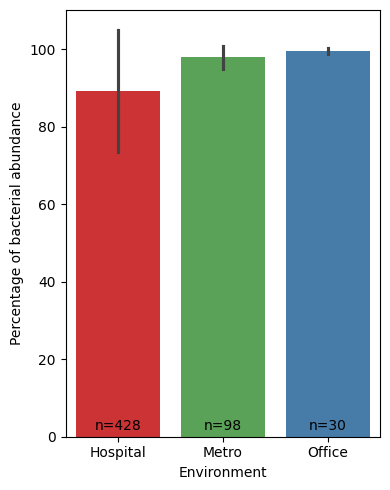

In [32]:
# ------------------------------
# Bacteria-Specific Analysis
# ------------------------------

# Boxplot of Bacterial Abundance
bacteria_data = merged_abundance[merged_abundance['Major_group'] == 'Bacteria'].sum(axis=0)
bacteria_df = pd.DataFrame(bacteria_data, columns=['Sum Bacteria Abundance']).rename_axis('Illumina Library ID')
bacteria_with_env = pd.merge(bacteria_df, sample_metadata['Environment'], left_index=True, right_index=True)

# Order environments alphabetically (optional, can customize)
env_order = sorted(bacteria_with_env['Environment'].unique())

plt.figure(figsize=(4, 5))
sns.barplot(x='Environment', y='Sum Bacteria Abundance', data=bacteria_with_env, 
            order=sorted(bacteria_with_env['Environment'].unique()), 
            errorbar='sd', palette='Set1', hue='Environment')
plt.xlabel('Environment')
plt.ylabel('Percentage of bacterial abundance')
plt.tight_layout()

# Add sample size (n=) above each bar
grouped = bacteria_with_env.groupby('Environment')
for i, env in enumerate(env_order):
    n_samples = grouped.get_group(env).shape[0]
    # You can adjust 'y' value to fine-tune the position inside bar
    plt.text(
        i, 1, f'n={n_samples}',    
        ha='center', va='bottom',         
        color='black', fontsize=10,
    )


plt.savefig(figures_dir + 'Figure_2A.svg', format='svg')
plt.show()

In [34]:
# ------------------------------
# Taxonomic Annotation
# ------------------------------

# Load corrected species names
updated_names = pd.read_csv(input_dir + 'Updated_names.csv')
name_map = updated_names.set_index('Previous name')['Updated name'].to_dict()

# Update species names and aggregate duplicates
bacteria_species = merged_abundance[merged_abundance['Major_group'] == 'Bacteria'].drop(columns='Major_group')
bacteria_species.index = bacteria_species.index.to_series().replace(name_map)
bacteria_species = bacteria_species.groupby(bacteria_species.index).sum()

# Retrieve NCBI taxonomy information
def fetch_taxonomy(name):
    try:
        ncbi = NCBITaxa()
        name_to_id = ncbi.get_name_translator([name])

        if not name_to_id:
            return {"Taxonomic_ID": "not found"}

        tax_id = name_to_id[name][0]
        lineage = ncbi.get_lineage(tax_id)
        ranks = ncbi.get_rank(lineage)
        names = ncbi.get_taxid_translator(lineage)

        return {"Taxonomic_ID": tax_id, **{ranks[tid]: names[tid] for tid in lineage}}
    
    except Exception as e:
        return {"Error": str(e)}

bacteria_species['Taxonomic_Info'] = bacteria_species.index.map(fetch_taxonomy)
taxonomic_df = pd.json_normalize(bacteria_species['Taxonomic_Info']).fillna('not found')
taxonomic_df.index = bacteria_species.index

# Filter for valid taxonomy entries
valid_taxa = taxonomic_df[taxonomic_df['Taxonomic_ID'] != 'not found']
filtered_species = bacteria_species.loc[valid_taxa.index].drop(columns='Taxonomic_Info') / 100


In [37]:
# ------------------------------
# Export Final Data
# ------------------------------

# Filtered sample metadata
filtered_metadata = sample_metadata.loc[sample_metadata.index.isin(filtered_species.columns)]

# Saving the data
df_dict, taxa_dict, metadata_dict = {}, {}, {}

# Save complete datasets
filtered_species.to_csv(output_dir + "phyloseq_source/all_filtered_data.csv")
valid_taxa.to_csv(output_dir + "phyloseq_source/all_filtered_taxa.csv")
filtered_metadata.to_csv(output_dir + "phyloseq_source/all_filtered_metadata.csv")

# Environment-specific datasets
for environment in sample_metadata['Environment'].unique():
    samples_in_env = sample_metadata[sample_metadata['Environment'] == environment].index
    env_data = filtered_species.loc[:, filtered_species.columns.isin(samples_in_env)]

    # Apply filtering thresholds
    env_data = env_data.loc[env_data.sum(axis=1) != 0]
    env_data = env_data.loc[:, env_data.sum(axis=0) != 0]
    env_data = env_data.loc[(env_data > 0).sum(axis=1) >= (0.1 * env_data.shape[1])]
    env_data = env_data.loc[(env_data >= 0.01).any(axis=1)]

    env_taxa = valid_taxa.loc[env_data.index]
    env_metadata = sample_metadata.loc[env_data.columns]

    df_dict[environment] = env_data
    taxa_dict[environment] = env_taxa
    metadata_dict[environment] = env_metadata

    env_data.to_csv(f"{output_dir}phyloseq_source/{environment}_filtered_data.csv")
    env_taxa.to_csv(f"{output_dir}phyloseq_source/{environment}_filtered_taxa.csv")
    env_metadata.to_csv(f"{output_dir}phyloseq_source/{environment}_filtered_metadata.csv")

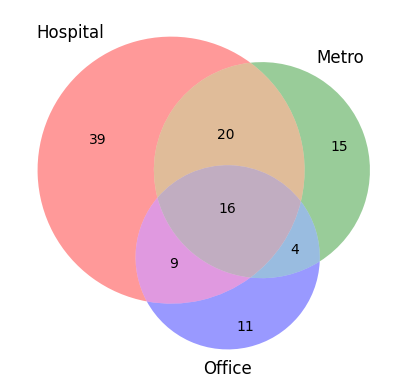

In [45]:
# -----------------------------------
# Extended Analyses
# -----------------------------------

# 1. Venn Diagram of Taxa Overlap
taxa_sets = {key: set(value.index) for key, value in taxa_dict.items()}

plt.figure(figsize=(5,6))
venn3([taxa_sets['Hospital'], taxa_sets['Metro'], taxa_sets['Office']],
      set_labels=['Hospital', 'Metro', 'Office'])
plt.show()

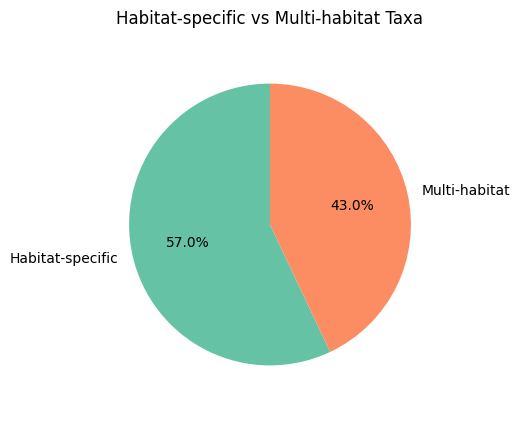

In [52]:
# 2. Pie Chart: Habitat-specific vs Multi-habitat Taxa
taxa_sets = {key: list(value) for key, value in taxa_sets.items()}
unique_values = sorted(list(set().union(*taxa_sets.values())))

df_taxa_binary = pd.DataFrame(0, index=unique_values, columns=sorted(taxa_sets.keys()))
for key, values in taxa_sets.items():
    df_taxa_binary.loc[values, key] = 1

df_taxa_binary.to_csv(output_dir + 'taxa_binary.csv', index=True, sep=',')

row_sum = df_taxa_binary.sum(axis=1)
classification = ['Habitat-specific' if val == 1 else 'Multi-habitat' for val in row_sum]

classification_counts = pd.Series(classification).value_counts()
plt.figure(figsize=(4,5))
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=90, colors=["#66c2a5", "#fc8d62"])
plt.axis('equal')
plt.title('Habitat-specific vs Multi-habitat Taxa')
plt.show()

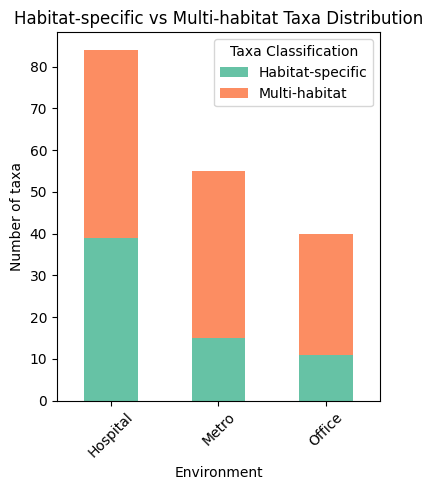

In [55]:
# 3. Stacked Barplot: Number of Taxa per Environment (by Classification)
df_taxa_binary['Classification'] = classification
presence_summary = df_taxa_binary.groupby('Classification').sum()

presence_summary.T.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(4,5))
plt.xlabel('Environment')
plt.ylabel('Number of taxa')
plt.title('Habitat-specific vs Multi-habitat Taxa Distribution')
plt.xticks(rotation=45)
plt.legend(title='Taxa Classification')
plt.tight_layout()
#plt.savefig(figures_dir + 'Supp_Fig_1C.svg', format='svg')
plt.show()

In [ ]:
# Getting genome details
# Retrieving NCBI RefSeq genome information 

#!wget https://ftp.ncbi.nlm.nih.gov/genomes/refseq/assembly_summary_refseq.txt -P /mnt/Local_Disk_1/2_Hospital_Microbiome/Data/Output_data/

In [62]:
def fetch_row_by_organism_name(local_file_path, organism_name):
    """
    Fetches the row from the local file that contains the given organism name.

    Parameters:
    local_file_path (str): The local path to the file.
    organism_name (str): The name of the organism to search for.

    Returns:
    str: The row containing the organism name, or None if not found.
    """
    try:
        with open(local_file_path, "r") as file:
            lines = file.readlines()
            key = 0
            for line in lines:
                if "assembly from type material" in line or "assembly from synonym type material" in line or "assembly designated as neotype" in line:
                    if organism_name in line:
                        return line
                        key = 1
                        
            if key == 0:
                for line in lines:
                    if "representative genome" in line:
                        if organism_name in line:
                            return line
                            key = 1
            
            if key == 0:
                for line in lines:
                    if organism_name in line:
                        return line
                        key = 1

                    
                        
    except FileNotFoundError:
        print("Local file not found.")

# Create an empty DataFrame
column_names = ["assembly_accession", "bioproject", "biosample", "wgs_master", "refseq_category",
                "taxid", "species_taxid", "organism_name", "infraspecific_name", "isolate",
                "version_status", "assembly_level", "release_type", "genome_rep", "seq_rel_date",
                "asm_name", "asm_submitter", "gbrs_paired_asm", "paired_asm_comp", "ftp_path",
                "excluded_from_refseq", "relation_to_type_material", "asm_not_live_date", "assembly_type",
                "group", "genome_size", "genome_size_ungapped", "gc_percent", "replicon_count",
                "scaffold_count", "contig_count", "annotation_provider", "annotation_name",
                "annotation_date", "total_gene_count", "protein_coding_gene_count", "non_coding_gene_count",
                "pubmed_id"]
genome_details = pd.DataFrame(columns=column_names)

# Iterate over unique_values and append rows to the DataFrame
ncbi_filepath = output_dir + 'assembly_summary_refseq.txt'

for organism_name in unique_values:
    row = fetch_row_by_organism_name(ncbi_filepath, organism_name)
    if row:
        row_data = row.split('\t')
        genome_details.loc[len(genome_details)] = row_data

# Set organism_name as the index
genome_details.set_index('organism_name')
genome_details = genome_details.sort_index()

# Setting unique_values as index
genome_details.index = unique_values

# Remove 'strain=' from 'infraspecific_name'
genome_details['infraspecific_name'] = genome_details['infraspecific_name'].str.replace('strain=', '')
genome_details.index.name = 'organism_name'

# Saving genome details to a CSV file
genome_details.to_csv(output_dir + '1_genome_details.csv', index=True, sep=',')

genome_details

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,replicon_count,scaffold_count,contig_count,annotation_provider,annotation_name,annotation_date,total_gene_count,protein_coding_gene_count,non_coding_gene_count,pubmed_id
organism_name,,,,,,,,,,,,,,,,,,,,,
Abiotrophia defectiva,GCF_037041345.1,PRJNA224116,SAMN40125968,na,na,592010,46125,Abiotrophia defectiva ATCC 49176,ATCC 49176,na,...,1,1,1,NCBI RefSeq,GCF_037041345.1-RS_2024_04_05,2024/04/05,1921,1834,63,na\n
Achromobacter xylosoxidans,GCF_022870085.1,PRJNA224116,SAMN14078804,na,na,85698,85698,Achromobacter xylosoxidans,PartM-Axylosoxidans-RM8376,na,...,1,1,1,NCBI RefSeq,GCF_022870085.1-RS_2024_04_26,2024/04/26,6297,6178,71,na\n
Acinetobacter baumannii,GCF_000369385.1,PRJNA224116,SAMN01828140,APRG00000000.1,na,575584,470,Acinetobacter baumannii ATCC 19606 = CIP 70.34...,CIP 70.34,na,...,0,23,32,NCBI RefSeq,NCBI Prokaryotic Genome Annotation Pipeline (P...,2024/01/08,3876,3711,108,na\n
Acinetobacter johnsonii,GCF_016027055.1,PRJNA224116,SAMN13450440,na,na,40214,40214,Acinetobacter johnsonii,FDAARGOS_910,na,...,4,4,4,NCBI RefSeq,NCBI Prokaryotic Genome Annotation Pipeline (P...,2023/11/29,3574,3336,117,na\n
Acinetobacter junii,GCF_000430225.1,PRJNA224116,SAMN02469990,ASYZ00000000.1,na,1217666,40215,Acinetobacter junii CIP 107470 = MTCC 11364,MTCC 11364,na,...,0,248,248,NCBI RefSeq,NCBI Prokaryotic Genome Annotation Pipeline (P...,2023/12/24,3429,3166,68,na\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stutzerimonas stutzeri,GCF_000219605.1,PRJNA224116,SAMN02603041,na,na,316,316,Stutzerimonas stutzeri,CGMCC 1.1803,na,...,1,1,1,NCBI RefSeq,NCBI Prokaryotic Genome Annotation Pipeline (P...,2024/03/03,4262,4105,76,21994926\n
Veillonella atypica,GCF_002959915.1,PRJNA224116,SAMD00090152,PPDE00000000.1,na,1128111,39777,Veillonella atypica KON,ATCC 17744,na,...,0,11,11,NCBI RefSeq,GCF_002959915.1-RS_2024_04_07,2024/04/07,1922,1842,64,na\n
Veillonella parvula,GCF_000024945.1,PRJNA224116,SAMN00002609,na,na,479436,29466,Veillonella parvula DSM 2008,DSM 2008,na,...,1,1,1,NCBI RefSeq,NCBI Prokaryotic Genome Annotation Pipeline (P...,2023/08/22,1909,1841,64,21304678\n


In [63]:
# Fetching accession details
accession_df = genome_details['assembly_accession'].to_frame()

# Sort the DataFrame by index
accession_df.sort_index()

# Save the DataFrame to a CSV file
accession_df.to_csv(output_dir + '2_accession_details.csv', index=True, sep=',')

# Display the DataFrame
accession_df

,assembly_accession
organism_name,
Abiotrophia defectiva,GCF_037041345.1
Achromobacter xylosoxidans,GCF_022870085.1
Acinetobacter baumannii,GCF_000369385.1
Acinetobacter johnsonii,GCF_016027055.1
Acinetobacter junii,GCF_000430225.1
...,...
Stutzerimonas stutzeri,GCF_000219605.1
Veillonella atypica,GCF_002959915.1
Veillonella parvula,GCF_000024945.1
